In [13]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np

In [14]:
(x_train, _), (x_test, _) = mnist.load_data()

In [15]:
x_train = x_train.astype('float32') / 255.
x_test = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train) , np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test) , np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(60000, 784)


In [16]:
encoding_dim = 32

input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [17]:
encoder = keras.Model(input_img, encoded)

In [18]:
encoded_input = keras.Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))



In [19]:
autoencoder.compile(optimizer='adam' , loss='binary_crossentropy')

In [20]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
938/938 [==============================] - 10s 10ms/step - loss: 0.1885 - val_loss: 0.4295
Epoch 2/20
938/938 [==============================] - 9s 9ms/step - loss: 0.1183 - val_loss: 0.2279
Epoch 3/20
938/938 [==============================] - 8s 8ms/step - loss: 0.1034 - val_loss: 0.0997
Epoch 4/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0974 - val_loss: 0.0530
Epoch 5/20
938/938 [==============================] - 9s 9ms/step - loss: 0.0954 - val_loss: 0.0381
Epoch 6/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0947 - val_loss: 0.0308
Epoch 7/20
938/938 [==============================] - 10s 10ms/step - loss: 0.0943 - val_loss: 0.0264
Epoch 8/20
938/938 [==============================] - 9s 9ms/step - loss: 0.0941 - val_loss: 0.0235
Epoch 9/20
938/938 [==============================] - 15s 16ms/step - loss: 0.0939 - val_loss: 0.0210
Epoch 10/20
938/938 [==============================] - 14s 15ms/step - loss: 0.0938 - val_loss

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


1875/1875 [==============================] - 3s 1ms/step


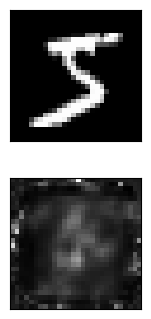

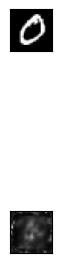

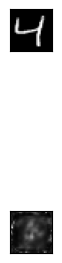

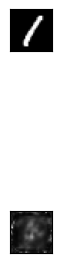

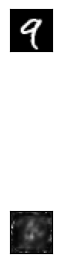

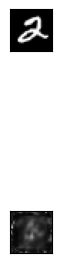

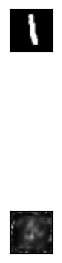

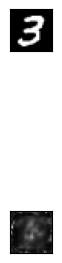

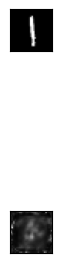

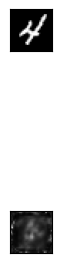

In [22]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis(). set_visible(False)
  ax.get_yaxis(). set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis(). set_visible(False)
  ax.get_yaxis(). set_visible(False)
  plt.show()
